In [1]:
import pandas as pd
data_frame = pd.read_csv('data.csv')
data_frame.shape

(18207, 89)

In [2]:
data_frame.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [3]:
data_frame.values

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '€226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '€127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '€228.1M'],
       ...,
       [18204, 241638, 'B. Worman', ..., 6.0, 13.0, '€165K'],
       [18205, 246268, 'D. Walker-Rice', ..., 8.0, 9.0, '€143K'],
       [18206, 246269, 'G. Nugent', ..., 12.0, 9.0, '€165K']],
      dtype=object)

In [16]:
df1 = pd.DataFrame(data_frame, columns=["Name", "Wage", "Value"])


def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if "K" in x:
        if len(x) > 1:
            return float(x.replace("K", "")) * 1000
        return 1000.0
    if "M" in x:
        if len(x) > 1:
            return float(x.replace("M", "")) * 1000000
        return 1000000.0
    if "B" in x:
        return float(x.replace("B", "")) * 1000000000
    return 0.0


wage = df1["Wage"].replace("\€", "", regex=True).apply(value_to_float)
value = df1["Value"].replace("\€", "", regex=True).apply(value_to_float)

df1["Wage"] = wage
df1["Value"] = value

df1["difference"] = df1["Value"] - df1["Wage"]
df1.sort_values("difference", ascending=False)

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,1000.0,0.0,-1000.0
12192,H. Sulaimani,3000.0,0.0,-3000.0
3550,S. Nakamura,4000.0,0.0,-4000.0
4228,B. Nivet,5000.0,0.0,-5000.0


<AxesSubplot: xlabel='Wage', ylabel='Value'>

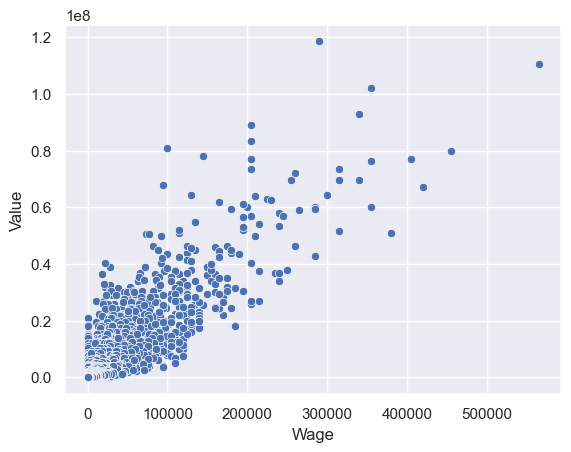

In [17]:
import seaborn as sb

sb.set()

graph = sb.scatterplot(df1, x="Wage", y="Value")
graph


In [27]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_file

output_file("./soccer.html")

TOOLTIPS = [
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name"),
]

p = figure(title="Soccer 2019", x_axis_label='Wage', y_axis_label='Value', width=700, tooltips=TOOLTIPS, tools=[HoverTool()])
p.circle("Wage", "Value", size=10, source=df1)
show(p)

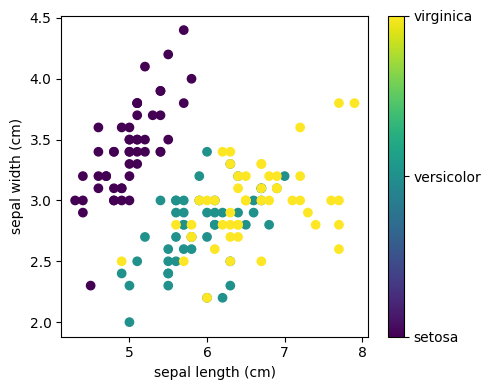

In [1]:
from sklearn.datasets import load_iris 
iris = load_iris() 
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

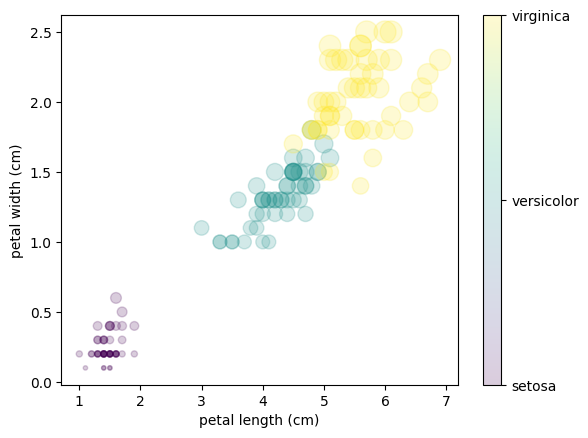

In [2]:
features = iris.data.T

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)